Cleaning data...
Data loaded successfully: 128976 records
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']

AMAZON SALES ANALYSIS - COMPREHENSIVE REPORT

1. SALES OVERVIEW ANALYSIS

Key Metrics:
  Total Orders: 128976
  Total Revenue: $78,590,170.25
  Average Order Value: $648.56
  Median Order Value: $605.00
  Unique Customers: N/A


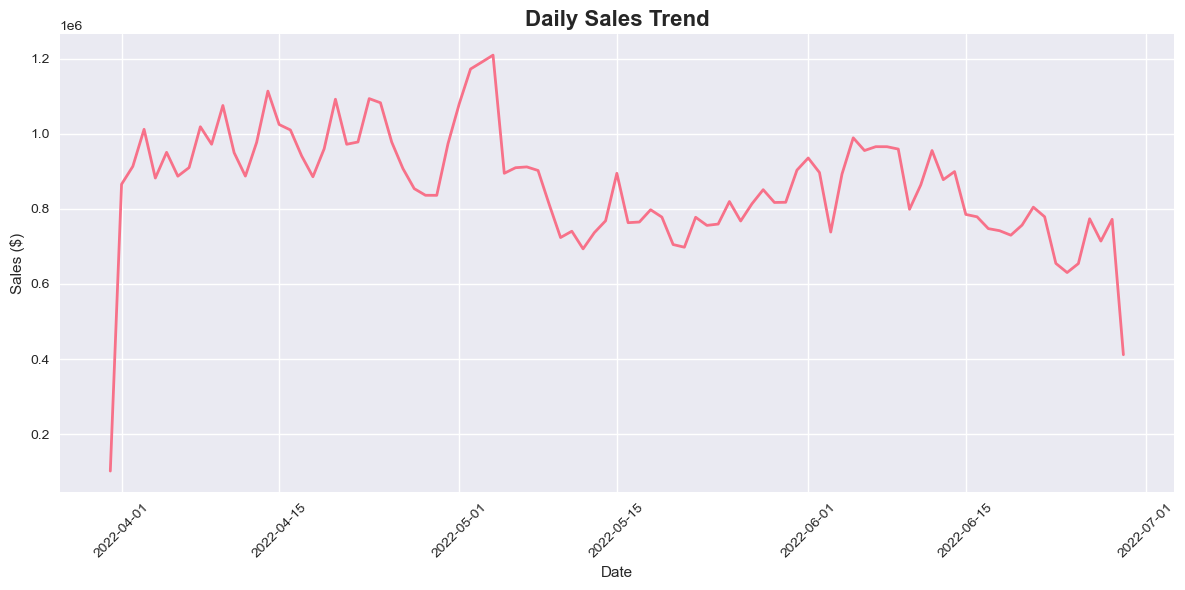


2. PRODUCT ANALYSIS

Product Category Distribution:
Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64


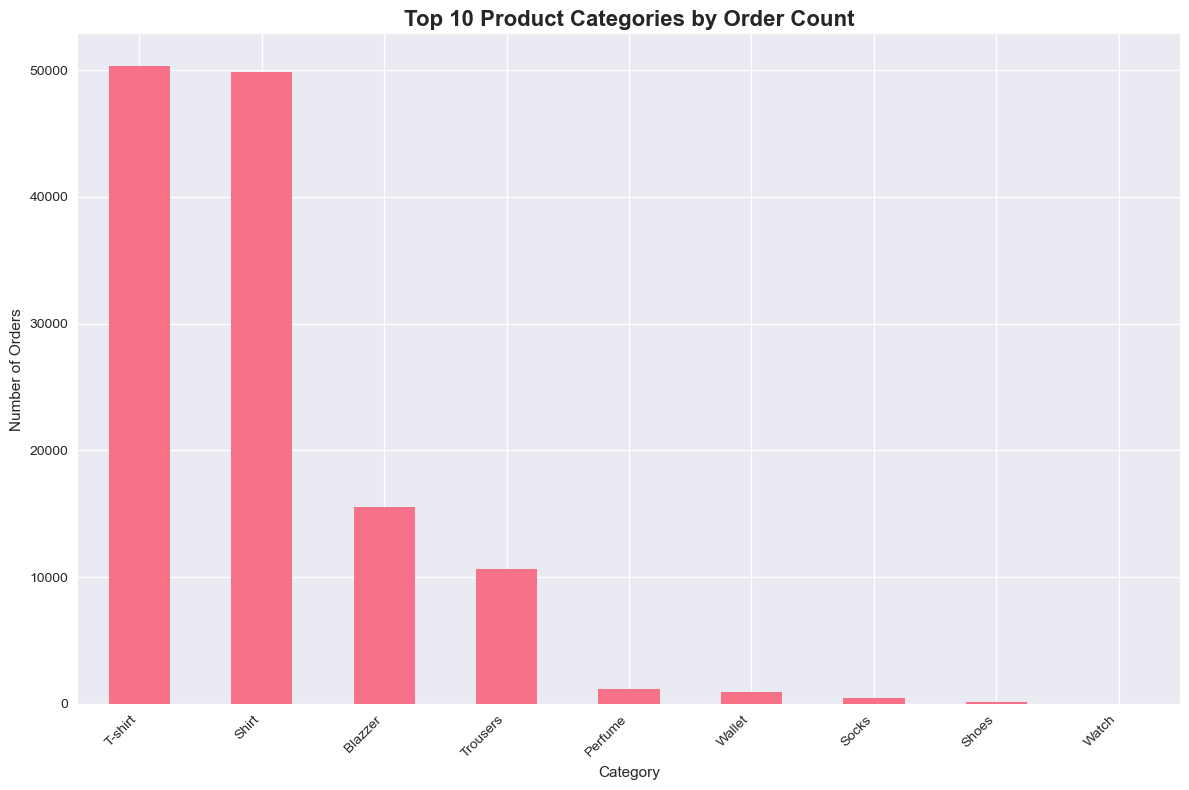

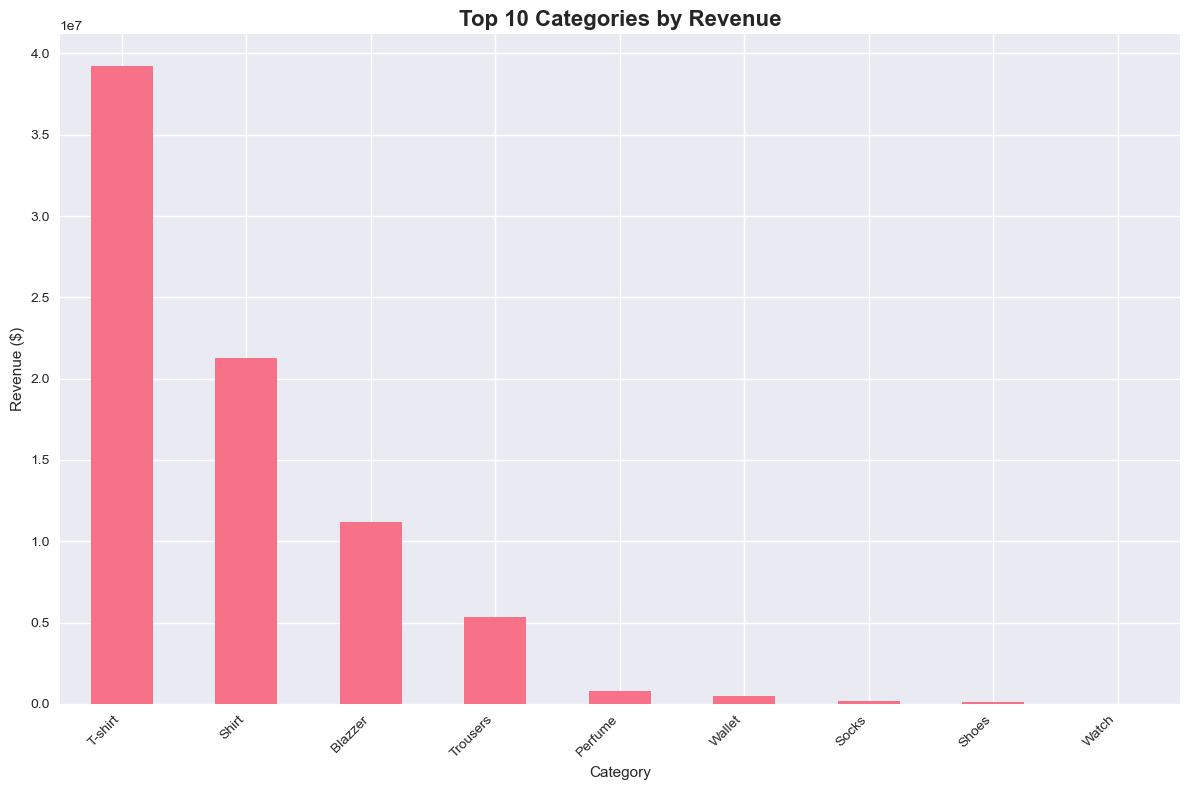


Product Size Distribution:
Size
M       22373
L       21807
XL      20549
XXL     17806
S       16776
3XL     14643
XS      11056
Free     2251
6XL       738
5XL       550
Name: count, dtype: int64


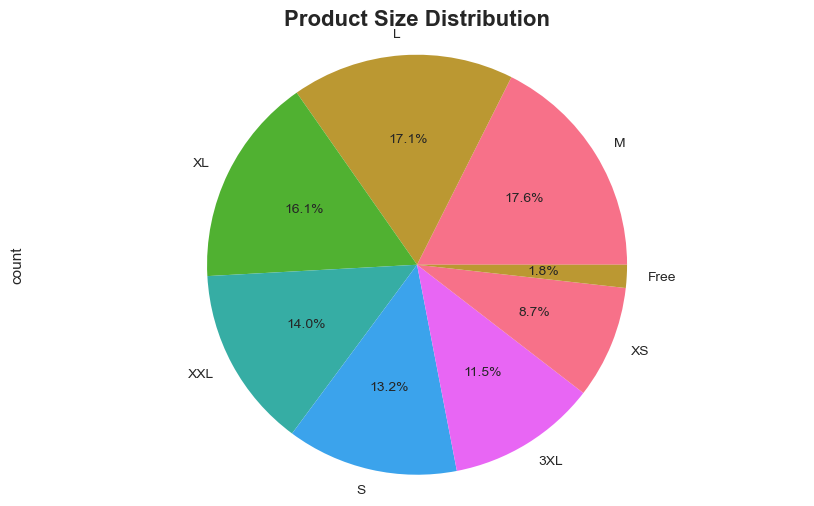


Quantity Statistics:
  Average Quantity per Order: 0.90
  Total Units Sold: 116,646
  Most Common Quantity: 1

3. FULFILLMENT ANALYSIS

Fulfillment Methods Distribution:
ship-service-level
Expedited    88630
Standard     40346
Name: count, dtype: int64


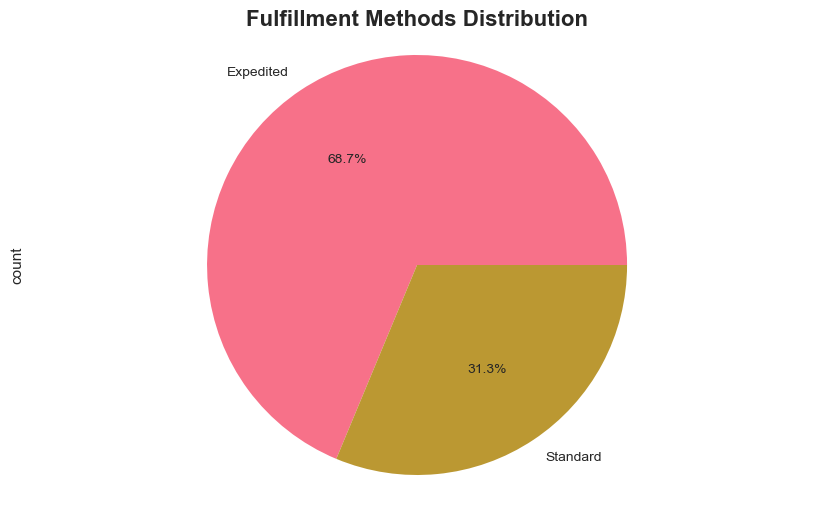


Fulfillment Status Cross-Analysis:
Status              Cancelled  Pending  Pending - Waiting for Pick Up  \
ship-service-level                                                      
Expedited               11427      413                              0   
Standard                 6907      245                            281   

Status              Shipped  Shipped - Damaged  Shipped - Delivered to Buyer  \
ship-service-level                                                             
Expedited             76790                  0                             0   
Standard               1025                  1                         28756   

Status              Shipped - Lost in Transit  Shipped - Out for Delivery  \
ship-service-level                                                          
Expedited                                   0                           0   
Standard                                    5                          35   

Status              Shipped - Picked Up  

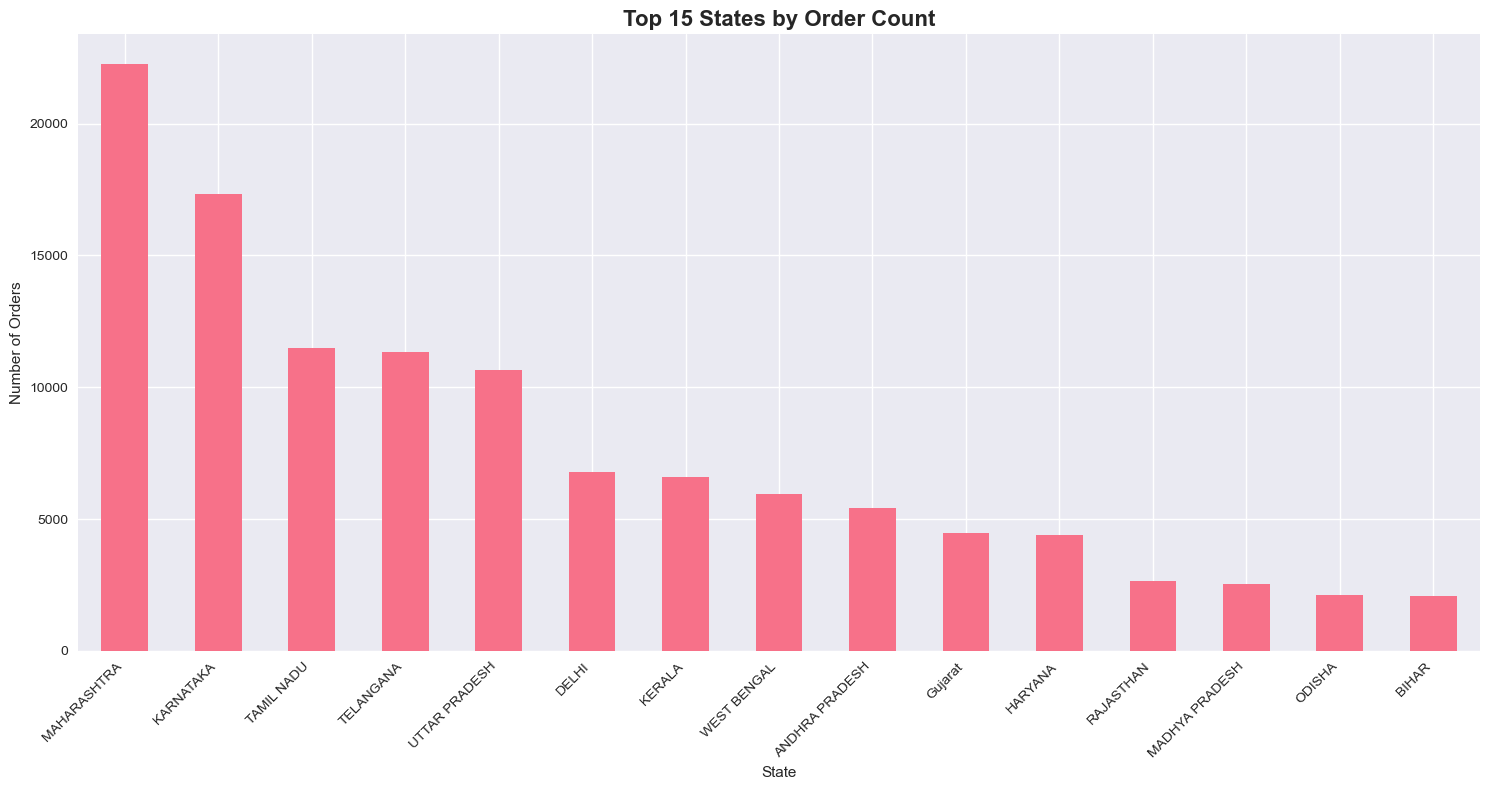

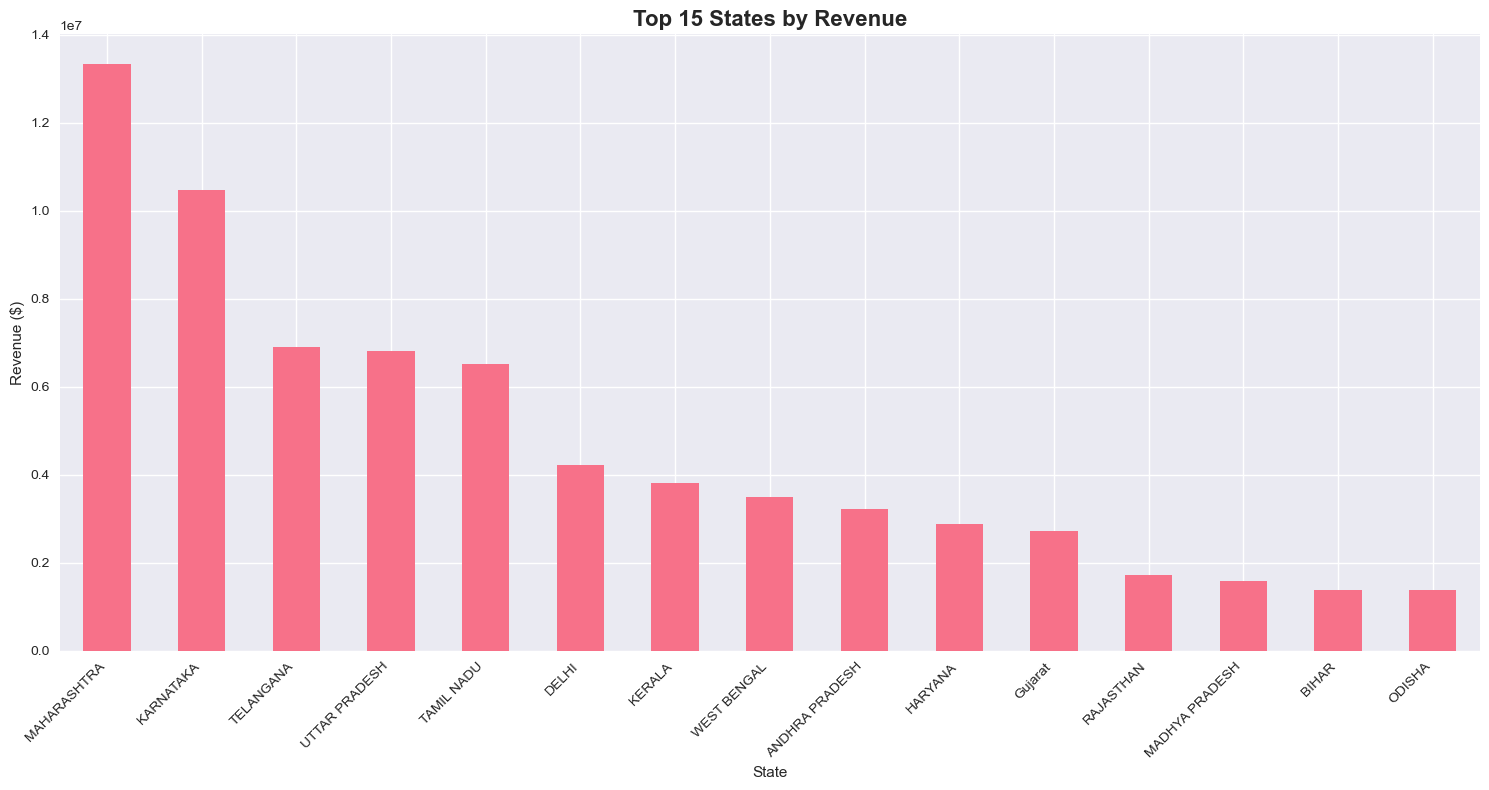


Sales by City:
ship-city
BENGALURU    11208
HYDERABAD     8077
MUMBAI        6125
NEW DELHI     5792
CHENNAI       5430
PUNE          3863
KOLKATA       2380
GURUGRAM      1865
THANE         1701
LUCKNOW       1462
Name: count, dtype: int64


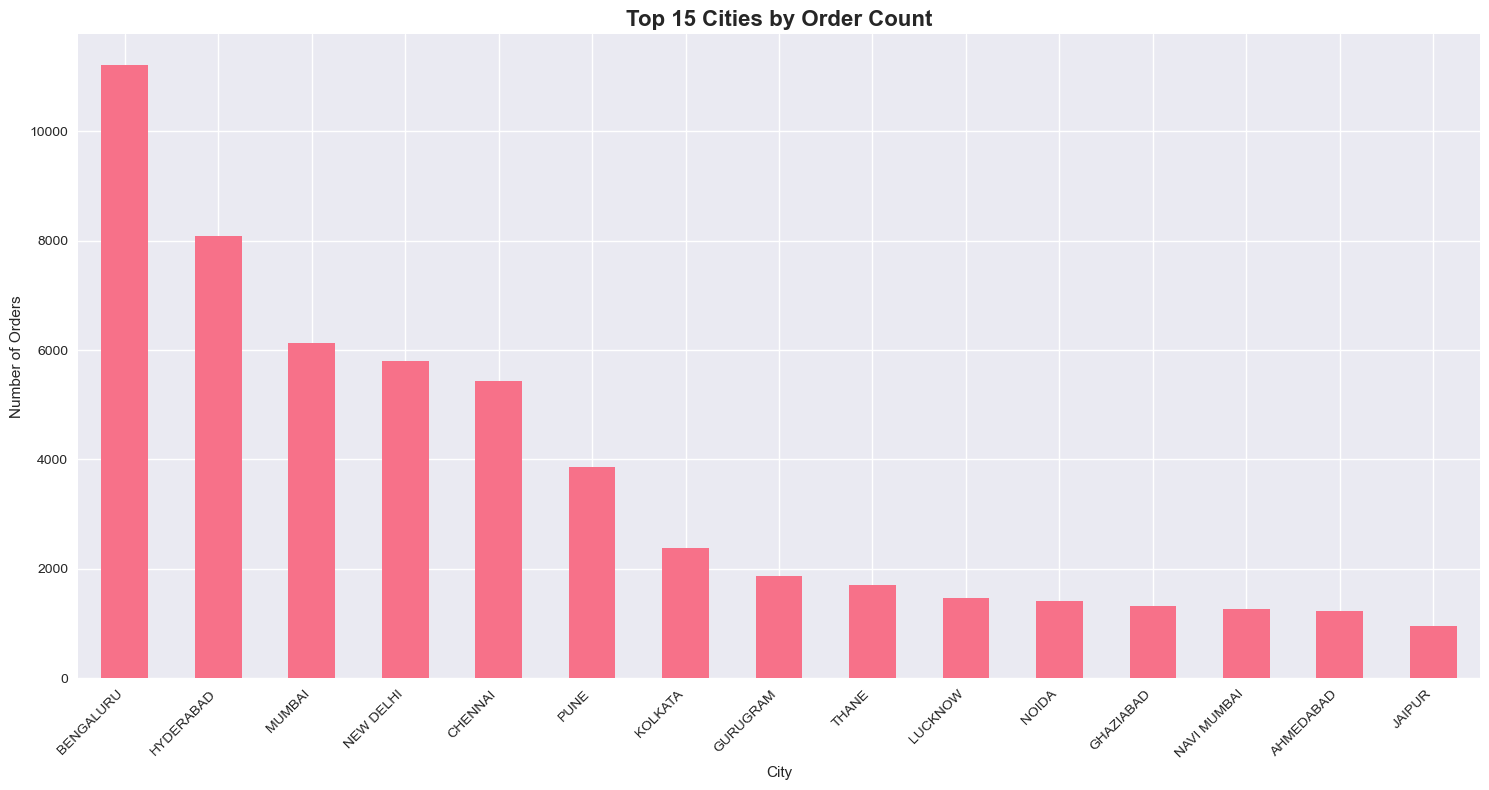


6. BUSINESS INSIGHTS & RECOMMENDATIONS

KEY INSIGHTS:
  1. Total revenue generated: $78,590,170.25
  2. Average order value: $648.56
  3. Most popular product category: T-shirt
  4. Product portfolio diversity: 9 categories
  5. Top performing state: MAHARASHTRA
  6. Geographic concentration: 17.3% of sales from top state

STRATEGIC RECOMMENDATIONS:
  1. Focus on premium customer retention strategies
  2. Invest more in marketing and inventory for T-shirt
  3. Consider expanding successful categories to related products
  4. Replicate successful strategies from top-performing regions
  5. Implement dynamic pricing strategies based on demand patterns
  6. Develop targeted marketing campaigns for underperforming regions
  7. Create seasonal inventory planning based on sales trends
  8. Establish customer feedback loops to improve product offerings
  9. Optimize fulfillment centers based on geographic demand
  10. Implement cross-selling strategies for high-value customer segments

DETAI

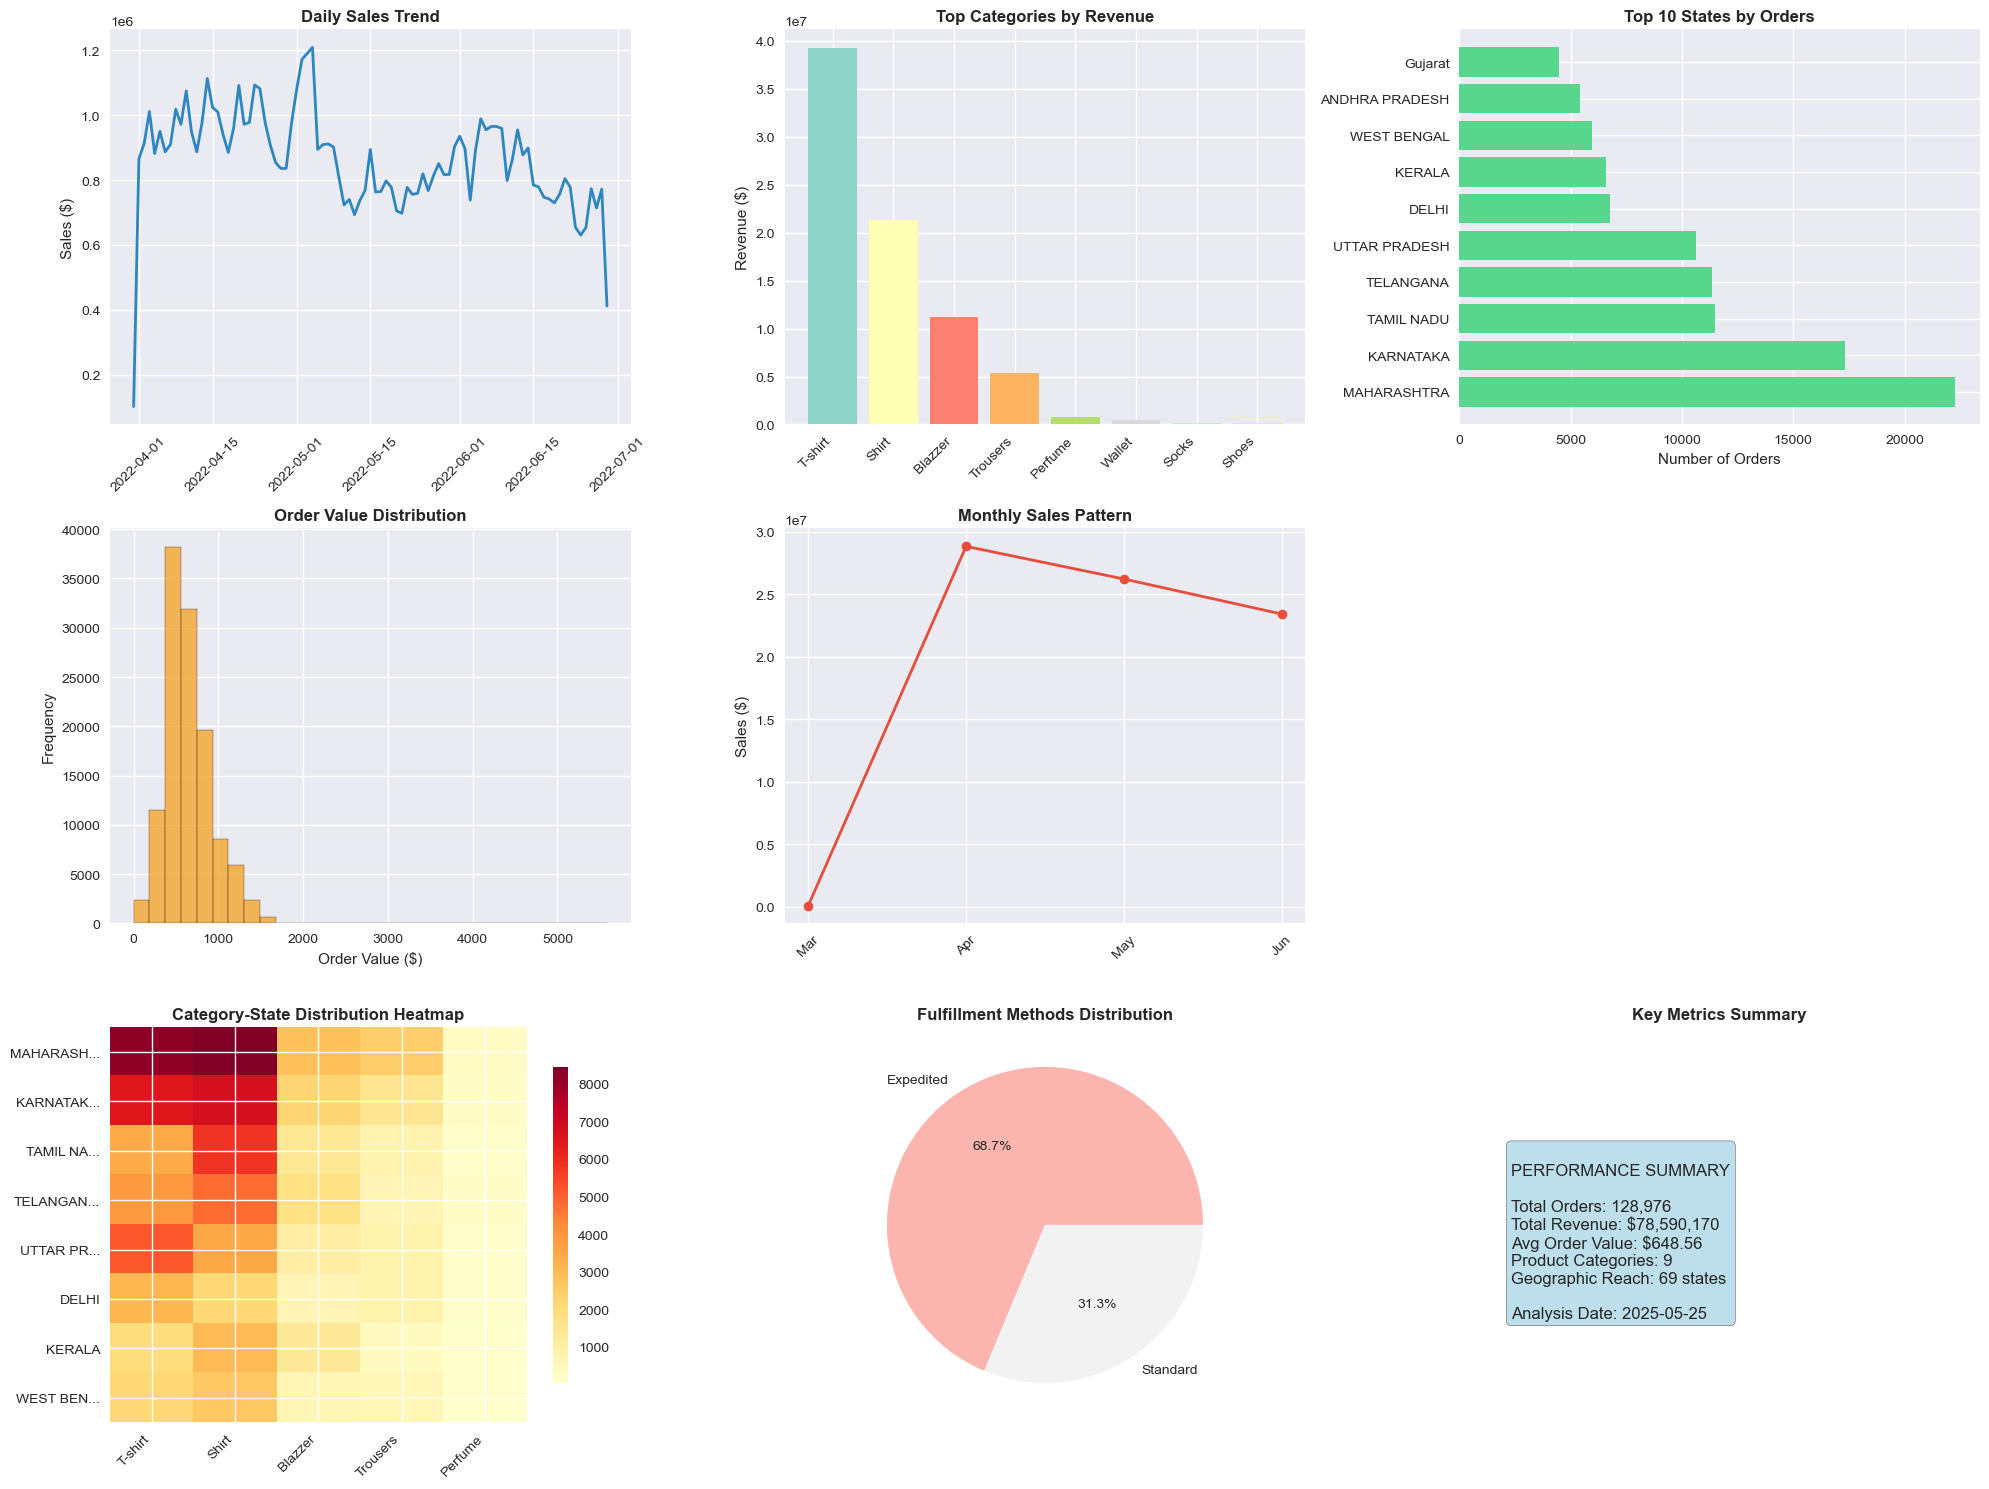

Advanced visualization saved as: Amazon_Sales_Analysis_Charts_20250525_230229.png

EXPORTING ANALYSIS RESULTS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class AmazonSalesAnalyzer:
    def __init__(self, csv_file_path):
        """
        Initialize the Amazon Sales Analyzer
        
        Parameters:
        csv_file_path (str): Path to the CSV file containing Amazon sales data
        """
        self.df = pd.read_csv('Amazon Sale Report.csv')
        self.clean_data()
        self.analysis_results = {}
        
    def clean_data(self):
        """Clean and preprocess the data"""
        print("Cleaning data...")
        
        # Remove leading/trailing whitespace from column names
        self.df.columns = self.df.columns.str.strip()
        
        # Convert date columns to datetime
        date_columns = [col for col in self.df.columns if 'date' in col.lower() or 'time' in col.lower()]
        for col in date_columns:
            try:
                self.df[col] = pd.to_datetime(self.df[col])
            except:
                pass
        
        # Handle missing values
        self.df = self.df.dropna(how='all')  # Remove completely empty rows
        
        # Convert monetary columns to numeric
        money_columns = [col for col in self.df.columns if any(keyword in col.lower() 
                        for keyword in ['amount', 'price', 'cost', 'revenue', 'sales'])]
        for col in money_columns:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        
        print(f"Data loaded successfully: {len(self.df)} records")
        print(f"Columns: {list(self.df.columns)}")
    
    def sales_overview_analysis(self):
        """1. Sales Overview Analysis"""
        print("\n" + "="*50)
        print("1. SALES OVERVIEW ANALYSIS")
        print("="*50)
        
        # Basic metrics
        total_orders = len(self.df)
        
        # Try to find revenue/sales column
        revenue_col = None
        for col in ['Amount', 'Revenue', 'Sales', 'Total', 'Price']:
            if col in self.df.columns:
                revenue_col = col
                break
        
        if revenue_col:
            total_revenue = self.df[revenue_col].sum()
            avg_order_value = self.df[revenue_col].mean()
            median_order_value = self.df[revenue_col].median()
        else:
            total_revenue = avg_order_value = median_order_value = "N/A"
        
        # Unique customers
        customer_col = None
        for col in ['Customer', 'Buyer', 'User', 'Customer ID']:
            if col in self.df.columns:
                customer_col = col
                break
        
        unique_customers = len(self.df[customer_col].unique()) if customer_col else "N/A"
        
        overview_stats = {
            'Total Orders': total_orders,
            'Total Revenue': f"${total_revenue:,.2f}" if isinstance(total_revenue, (int, float)) else total_revenue,
            'Average Order Value': f"${avg_order_value:.2f}" if isinstance(avg_order_value, (int, float)) else avg_order_value,
            'Median Order Value': f"${median_order_value:.2f}" if isinstance(median_order_value, (int, float)) else median_order_value,
            'Unique Customers': unique_customers
        }
        
        print("\nKey Metrics:")
        for key, value in overview_stats.items():
            print(f"  {key}: {value}")
        
        self.analysis_results['overview'] = overview_stats
        
        # Sales trend over time
        date_col = None
        for col in self.df.columns:
            if 'date' in col.lower() and self.df[col].dtype == 'datetime64[ns]':
                date_col = col
                break
        
        if date_col and revenue_col:
            plt.figure(figsize=(12, 6))
            daily_sales = self.df.groupby(self.df[date_col].dt.date)[revenue_col].sum()
            plt.plot(daily_sales.index, daily_sales.values, linewidth=2)
            plt.title('Daily Sales Trend', fontsize=16, fontweight='bold')
            plt.xlabel('Date')
            plt.ylabel('Sales ($)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    
    def product_analysis(self):
        """2. Product Analysis"""
        print("\n" + "="*50)
        print("2. PRODUCT ANALYSIS")
        print("="*50)
        
        # Find product-related columns
        category_col = None
        for col in ['Category', 'Product Category', 'Item Category']:
            if col in self.df.columns:
                category_col = col
                break
        
        size_col = None
        for col in ['Size', 'Product Size', 'Item Size']:
            if col in self.df.columns:
                size_col = col
                break
        
        quantity_col = None
        for col in ['Qty', 'Quantity', 'Units']:
            if col in self.df.columns:
                quantity_col = col
                break
        
        # Category Analysis
        if category_col:
            print(f"\nProduct Category Distribution:")
            category_counts = self.df[category_col].value_counts()
            print(category_counts.head(10))
            
            # Visualize top categories
            plt.figure(figsize=(12, 8))
            category_counts.head(10).plot(kind='bar')
            plt.title('Top 10 Product Categories by Order Count', fontsize=16, fontweight='bold')
            plt.xlabel('Category')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Revenue by category
            revenue_col = self._find_revenue_column()
            if revenue_col:
                category_revenue = self.df.groupby(category_col)[revenue_col].sum().sort_values(ascending=False)
                plt.figure(figsize=(12, 8))
                category_revenue.head(10).plot(kind='bar')
                plt.title('Top 10 Categories by Revenue', fontsize=16, fontweight='bold')
                plt.xlabel('Category')
                plt.ylabel('Revenue ($)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
        
        # Size Analysis
        if size_col:
            print(f"\nProduct Size Distribution:")
            size_counts = self.df[size_col].value_counts()
            print(size_counts.head(10))
            
            plt.figure(figsize=(10, 6))
            size_counts.head(8).plot(kind='pie', autopct='%1.1f%%')
            plt.title('Product Size Distribution', fontsize=16, fontweight='bold')
            plt.axis('equal')
            plt.show()
        
        # Quantity Analysis
        if quantity_col:
            print(f"\nQuantity Statistics:")
            print(f"  Average Quantity per Order: {self.df[quantity_col].mean():.2f}")
            print(f"  Total Units Sold: {self.df[quantity_col].sum():,}")
            print(f"  Most Common Quantity: {self.df[quantity_col].mode().iloc[0]}")
    
    def fulfillment_analysis(self):
        """3. Fulfillment Analysis"""
        print("\n" + "="*50)
        print("3. FULFILLMENT ANALYSIS")
        print("="*50)
        
        # Find fulfillment-related columns
        fulfillment_col = None
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['fulfillment', 'ship', 'delivery']):
                fulfillment_col = col
                break
        
        if fulfillment_col:
            print(f"\nFulfillment Methods Distribution:")
            fulfillment_counts = self.df[fulfillment_col].value_counts()
            print(fulfillment_counts)
            
            # Visualize fulfillment methods
            plt.figure(figsize=(10, 6))
            fulfillment_counts.plot(kind='pie', autopct='%1.1f%%')
            plt.title('Fulfillment Methods Distribution', fontsize=16, fontweight='bold')
            plt.axis('equal')
            plt.show()
            
            # Fulfillment effectiveness (if we have status or timing data)
            status_col = None
            for col in self.df.columns:
                if any(keyword in col.lower() for keyword in ['status', 'state']):
                    status_col = col
                    break
            
            if status_col:
                fulfillment_status = pd.crosstab(self.df[fulfillment_col], self.df[status_col])
                print(f"\nFulfillment Status Cross-Analysis:")
                print(fulfillment_status)
        
        else:
            print("No fulfillment-related columns found in the dataset.")
    
    def customer_segmentation(self):
        """4. Customer Segmentation Analysis"""
        print("\n" + "="*50)
        print("4. CUSTOMER SEGMENTATION ANALYSIS")
        print("="*50)
        
        customer_col = self._find_customer_column()
        revenue_col = self._find_revenue_column()
        
        if customer_col and revenue_col:
            # Customer spending analysis
            customer_spending = self.df.groupby(customer_col).agg({
                revenue_col: ['sum', 'count', 'mean']
            }).round(2)
            
            customer_spending.columns = ['Total_Spent', 'Order_Count', 'Avg_Order_Value']
            customer_spending = customer_spending.reset_index()
            
            print("Customer Spending Statistics:")
            print(customer_spending.describe())
            
            # Customer segmentation based on RFM-like analysis
            # Recency, Frequency, Monetary
            current_date = self.df[self._find_date_column()].max() if self._find_date_column() else datetime.now()
            
            if self._find_date_column():
                customer_metrics = self.df.groupby(customer_col).agg({
                    self._find_date_column(): 'max',  # Last purchase date
                    revenue_col: ['sum', 'count']
                })
                
                customer_metrics.columns = ['Last_Purchase', 'Total_Spent', 'Purchase_Count']
                customer_metrics['Recency'] = (current_date - customer_metrics['Last_Purchase']).dt.days
                
                # Create customer segments
                customer_metrics['Frequency_Score'] = pd.qcut(customer_metrics['Purchase_Count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
                customer_metrics['Monetary_Score'] = pd.qcut(customer_metrics['Total_Spent'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
                
                # Visualize customer segments
                plt.figure(figsize=(12, 8))
                segment_counts = customer_metrics.groupby(['Frequency_Score', 'Monetary_Score']).size().unstack()
                sns.heatmap(segment_counts, annot=True, fmt='d', cmap='Blues')
                plt.title('Customer Segmentation Matrix (Frequency vs Monetary)', fontsize=16, fontweight='bold')
                plt.show()
        
        else:
            print("Customer or revenue data not available for segmentation analysis.")
    
    def geographical_analysis(self):
        """5. Geographical Analysis"""
        print("\n" + "="*50)
        print("5. GEOGRAPHICAL ANALYSIS")
        print("="*50)
        
        # Find location columns
        state_col = city_col = None
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['state', 'province']):
                state_col = col
            elif any(keyword in col.lower() for keyword in ['city', 'town']):
                city_col = col
        
        revenue_col = self._find_revenue_column()
        
        # State-wise analysis
        if state_col:
            print("Sales by State:")
            state_orders = self.df[state_col].value_counts()
            print(state_orders.head(10))
            
            plt.figure(figsize=(15, 8))
            state_orders.head(15).plot(kind='bar')
            plt.title('Top 15 States by Order Count', fontsize=16, fontweight='bold')
            plt.xlabel('State')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            if revenue_col:
                state_revenue = self.df.groupby(state_col)[revenue_col].sum().sort_values(ascending=False)
                plt.figure(figsize=(15, 8))
                state_revenue.head(15).plot(kind='bar')
                plt.title('Top 15 States by Revenue', fontsize=16, fontweight='bold')
                plt.xlabel('State')
                plt.ylabel('Revenue ($)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
        
        # City-wise analysis
        if city_col:
            print("\nSales by City:")
            city_orders = self.df[city_col].value_counts()
            print(city_orders.head(10))
            
            plt.figure(figsize=(15, 8))
            city_orders.head(15).plot(kind='bar')
            plt.title('Top 15 Cities by Order Count', fontsize=16, fontweight='bold')
            plt.xlabel('City')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    
    def generate_business_insights(self):
        """6. Generate Business Insights and Recommendations"""
        print("\n" + "="*50)
        print("6. BUSINESS INSIGHTS & RECOMMENDATIONS")
        print("="*50)
        
        insights = []
        recommendations = []
        
        # Revenue insights
        revenue_col = self._find_revenue_column()
        if revenue_col:
            total_revenue = self.df[revenue_col].sum()
            avg_order_value = self.df[revenue_col].mean()
            
            insights.append(f"Total revenue generated: ${total_revenue:,.2f}")
            insights.append(f"Average order value: ${avg_order_value:.2f}")
            
            if avg_order_value < 50:
                recommendations.append("Consider bundling products or offering volume discounts to increase average order value")
            elif avg_order_value > 200:
                recommendations.append("Focus on premium customer retention strategies")
        
        # Product insights
        category_col = self._find_category_column()
        if category_col:
            top_category = self.df[category_col].value_counts().index[0]
            category_diversity = len(self.df[category_col].unique())
            
            insights.append(f"Most popular product category: {top_category}")
            insights.append(f"Product portfolio diversity: {category_diversity} categories")
            
            recommendations.append(f"Invest more in marketing and inventory for {top_category}")
            recommendations.append("Consider expanding successful categories to related products")
        
        # Customer insights
        customer_col = self._find_customer_column()
        if customer_col:
            repeat_customers = self.df[customer_col].value_counts()
            repeat_rate = len(repeat_customers[repeat_customers > 1]) / len(repeat_customers) * 100
            
            insights.append(f"Customer repeat purchase rate: {repeat_rate:.1f}%")
            
            if repeat_rate < 30:
                recommendations.append("Implement customer loyalty programs to improve retention")
            else:
                recommendations.append("Leverage loyal customer base for referral programs")
        
        # Geographic insights
        state_col = self._find_state_column()
        if state_col:
            top_state = self.df[state_col].value_counts().index[0]
            geographic_concentration = self.df[state_col].value_counts().iloc[0] / len(self.df) * 100
            
            insights.append(f"Top performing state: {top_state}")
            insights.append(f"Geographic concentration: {geographic_concentration:.1f}% of sales from top state")
            
            if geographic_concentration > 40:
                recommendations.append("Diversify marketing efforts to reduce geographic concentration risk")
            else:
                recommendations.append("Replicate successful strategies from top-performing regions")
        
        # Additional strategic recommendations
        recommendations.extend([
            "Implement dynamic pricing strategies based on demand patterns",
            "Develop targeted marketing campaigns for underperforming regions",
            "Create seasonal inventory planning based on sales trends",
            "Establish customer feedback loops to improve product offerings",
            "Optimize fulfillment centers based on geographic demand",
            "Implement cross-selling strategies for high-value customer segments"
        ])
        
        print("\nKEY INSIGHTS:")
        for i, insight in enumerate(insights, 1):
            print(f"  {i}. {insight}")
        
        print("\nSTRATEGIC RECOMMENDATIONS:")
        for i, rec in enumerate(recommendations, 1):
            print(f"  {i}. {rec}")
        
        # Save insights and recommendations
        self.analysis_results['insights'] = insights
        self.analysis_results['recommendations'] = recommendations
        
        return insights, recommendations
    
    def create_advanced_visualizations(self):
        """Create comprehensive visualization suite"""
        print("\n" + "="*50)
        print("GENERATING ADVANCED VISUALIZATIONS")
        print("="*50)
        
        # Set up subplot configuration
        fig = plt.figure(figsize=(20, 15))
        
        revenue_col = self._find_revenue_column()
        category_col = self._find_category_column()
        state_col = self._find_state_column()
        date_col = self._find_date_column()
        
        # 1. Sales Trend Over Time
        if date_col and revenue_col:
            plt.subplot(3, 3, 1)
            daily_sales = self.df.groupby(self.df[date_col].dt.date)[revenue_col].sum()
            plt.plot(daily_sales.index, daily_sales.values, linewidth=2, color='#2E86C1')
            plt.title('Daily Sales Trend', fontweight='bold', fontsize=12)
            plt.xticks(rotation=45)
            plt.ylabel('Sales ($)')
        
        # 2. Top Categories Revenue
        if category_col and revenue_col:
            plt.subplot(3, 3, 2)
            top_categories_rev = self.df.groupby(category_col)[revenue_col].sum().nlargest(8)
            colors = plt.cm.Set3(np.linspace(0, 1, len(top_categories_rev)))
            bars = plt.bar(range(len(top_categories_rev)), top_categories_rev.values, color=colors)
            plt.title('Top Categories by Revenue', fontweight='bold', fontsize=12)
            plt.xticks(range(len(top_categories_rev)), 
                      [cat[:10] + '...' if len(cat) > 10 else cat for cat in top_categories_rev.index], 
                      rotation=45, ha='right')
            plt.ylabel('Revenue ($)')
        
        # 3. Geographic Distribution
        if state_col:
            plt.subplot(3, 3, 3)
            top_states = self.df[state_col].value_counts().head(10)
            plt.barh(range(len(top_states)), top_states.values, color='#58D68D')
            plt.title('Top 10 States by Orders', fontweight='bold', fontsize=12)
            plt.yticks(range(len(top_states)), top_states.index)
            plt.xlabel('Number of Orders')
        
        # 4. Order Value Distribution
        if revenue_col:
            plt.subplot(3, 3, 4)
            plt.hist(self.df[revenue_col], bins=30, alpha=0.7, color='#F39C12', edgecolor='black')
            plt.title('Order Value Distribution', fontweight='bold', fontsize=12)
            plt.xlabel('Order Value ($)')
            plt.ylabel('Frequency')
        
        # 5. Monthly Sales Pattern
        if date_col and revenue_col:
            plt.subplot(3, 3, 5)
            self.df['Month'] = self.df[date_col].dt.month
            monthly_sales = self.df.groupby('Month')[revenue_col].sum()
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            plt.plot([month_names[i-1] for i in monthly_sales.index], 
                    monthly_sales.values, marker='o', linewidth=2, color='#E74C3C')
            plt.title('Monthly Sales Pattern', fontweight='bold', fontsize=12)
            plt.xticks(rotation=45)
            plt.ylabel('Sales ($)')
        
        # 6. Customer Segments (if customer data available)
        customer_col = self._find_customer_column()
        if customer_col and revenue_col:
            plt.subplot(3, 3, 6)
            customer_spending = self.df.groupby(customer_col)[revenue_col].sum()
            spending_segments = pd.cut(customer_spending, bins=4, labels=['Low', 'Medium', 'High', 'Premium'])
            segment_counts = spending_segments.value_counts()
            colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
            plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
                   colors=colors, startangle=90)
            plt.title('Customer Spending Segments', fontweight='bold', fontsize=12)
        
        # 7. Category vs State Heatmap
        if category_col and state_col:
            plt.subplot(3, 3, 7)
            top_categories = self.df[category_col].value_counts().head(5).index
            top_states = self.df[state_col].value_counts().head(8).index
            
            heatmap_data = []
            for state in top_states:
                state_data = []
                for category in top_categories:
                    count = len(self.df[(self.df[state_col] == state) & (self.df[category_col] == category)])
                    state_data.append(count)
                heatmap_data.append(state_data)
            
            heatmap_data = np.array(heatmap_data)
            im = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
            plt.title('Category-State Distribution Heatmap', fontweight='bold', fontsize=12)
            plt.xticks(range(len(top_categories)), 
                      [cat[:8] + '...' if len(cat) > 8 else cat for cat in top_categories], 
                      rotation=45, ha='right')
            plt.yticks(range(len(top_states)), 
                      [state[:8] + '...' if len(state) > 8 else state for state in top_states])
            plt.colorbar(im, ax=plt.gca(), shrink=0.8)
        
        # 8. Fulfillment Method Performance
        fulfillment_col = None
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['fulfillment', 'ship', 'delivery']):
                fulfillment_col = col
                break
        
        if fulfillment_col:
            plt.subplot(3, 3, 8)
            fulfillment_counts = self.df[fulfillment_col].value_counts()
            colors = plt.cm.Pastel1(np.linspace(0, 1, len(fulfillment_counts)))
            wedges, texts, autotexts = plt.pie(fulfillment_counts.values, 
                                              labels=fulfillment_counts.index, 
                                              autopct='%1.1f%%', colors=colors)
            plt.title('Fulfillment Methods Distribution', fontweight='bold', fontsize=12)
        
        # 9. Performance Summary Box
        plt.subplot(3, 3, 9)
        plt.axis('off')
        summary_text = f"""
PERFORMANCE SUMMARY

Total Orders: {len(self.df):,}
"""
        if revenue_col:
            summary_text += f"Total Revenue: ${self.df[revenue_col].sum():,.0f}\n"
            summary_text += f"Avg Order Value: ${self.df[revenue_col].mean():.2f}\n"
        
        if customer_col:
            summary_text += f"Unique Customers: {self.df[customer_col].nunique():,}\n"
        
        if category_col:
            summary_text += f"Product Categories: {self.df[category_col].nunique()}\n"
        
        if state_col:
            summary_text += f"Geographic Reach: {self.df[state_col].nunique()} states\n"
        
        summary_text += f"\nAnalysis Date: {datetime.now().strftime('%Y-%m-%d')}"
        
        plt.text(0.1, 0.7, summary_text, fontsize=12, verticalalignment='top', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
        plt.title('Key Metrics Summary', fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(f'Amazon_Sales_Analysis_Charts_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Advanced visualization saved as: Amazon_Sales_Analysis_Charts_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
    
    def export_analysis_results(self):
        """Export detailed analysis results to Excel"""
        print("\n" + "="*50)
        print("EXPORTING ANALYSIS RESULTS")
        print("="*50)
        
        try:
            with pd.ExcelWriter(f'Amazon_Sales_Analysis_{datetime.now().strftime("%Y%m%d_%H%M%S")}.xlsx', 
                               engine='openpyxl') as writer:
                
                # Raw data
                self.df.to_excel(writer, sheet_name='Raw_Data', index=False)
                
                # Sales summary
                revenue_col = self._find_revenue_column()
                if revenue_col:
                    sales_summary = pd.DataFrame({
                        'Metric': ['Total Orders', 'Total Revenue', 'Average Order Value', 'Median Order Value'],
                        'Value': [len(self.df), self.df[revenue_col].sum(), 
                                 self.df[revenue_col].mean(), self.df[revenue_col].median()]
                    })
                    sales_summary.to_excel(writer, sheet_name='Sales_Summary', index=False)
                
                # Category analysis
                category_col = self._find_category_column()
                if category_col and revenue_col:
                    category_analysis = self.df.groupby(category_col).agg({
                        revenue_col: ['count', 'sum', 'mean']
                    }).round(2)
                    category_analysis.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value']
                    category_analysis.to_excel(writer, sheet_name='Category_Analysis')
                
                # Geographic analysis
                state_col = self._find_state_column()
                if state_col and revenue_col:
                    geo_analysis = self.df.groupby(state_col).agg({
                        revenue_col: ['count', 'sum', 'mean']
                    }).round(2)
                    geo_analysis.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value']
                    geo_analysis.to_excel(writer, sheet_name='Geographic_Analysis')
                
                # Customer analysis
                customer_col = self._find_customer_column()
                if customer_col and revenue_col:
                    customer_analysis = self.df.groupby(customer_col).agg({
                        revenue_col: ['count', 'sum', 'mean']
                    }).round(2)
                    customer_analysis.columns = ['Order_Count', 'Total_Spent', 'Avg_Order_Value']
                    customer_analysis.to_excel(writer, sheet_name='Customer_Analysis')
                
                # Insights and recommendations
                if 'insights' in self.analysis_results and 'recommendations' in self.analysis_results:
                    insights_df = pd.DataFrame({
                        'Insights': self.analysis_results['insights'],
                        'Recommendations': self.analysis_results['recommendations'][:len(self.analysis_results['insights'])]
                    })
                    insights_df.to_excel(writer, sheet_name='Insights_Recommendations', index=False)
            
            print(f"Analysis results exported to: Amazon_Sales_Analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx")
            
        except Exception as e:
            print(f"Note: Excel export requires openpyxl. Install with: pip install openpyxl")
            print(f"Error: {e}")

        """Generate comprehensive analysis report"""
        print("\n" + "="*70)
        print("AMAZON SALES ANALYSIS - COMPREHENSIVE REPORT")
        print("="*70)
        
        # Run all analyses
        self.sales_overview_analysis()
        self.product_analysis()
        self.fulfillment_analysis()
        self.customer_segmentation()
        self.geographical_analysis()
        insights, recommendations = self.generate_business_insights()
        
    def generate_comprehensive_report(self):
        """Generate comprehensive analysis report with all deliverables"""
        print("\n" + "="*70)
        print("AMAZON SALES ANALYSIS - COMPREHENSIVE REPORT")
        print("="*70)
        
        # Run all analyses
        self.sales_overview_analysis()
        self.product_analysis()
        self.fulfillment_analysis()
        self.customer_segmentation()
        self.geographical_analysis()
        insights, recommendations = self.generate_business_insights()
        
        # Generate detailed written report
        self.generate_detailed_written_report(insights, recommendations)
        
        # Create advanced visualizations
        self.create_advanced_visualizations()
        
        # Export results
        self.export_analysis_results()
        
        # Summary
        print("\n" + "="*50)
        print("EXECUTIVE SUMMARY")
        print("="*50)
        print(f"Dataset contains {len(self.df)} records with {len(self.df.columns)} attributes")
        print(f"Analysis period: {self._get_date_range()}")
        print("\nThis analysis provides actionable insights across:")
        print("- Sales performance and trends")
        print("- Product category effectiveness")
        print("- Fulfillment method optimization")
        print("- Customer behavior patterns")
        print("- Geographic market opportunities")
        
        print("\n" + "="*50)
        print("DELIVERABLES GENERATED")
        print("="*50)
        print("✓ 1. Comprehensive Analysis Report (printed above + saved to .txt file)")
        print("✓ 2. Advanced Visualizations Suite (saved as .png file)")
        print("✓ 3. Product Preferences, Customer Behavior & Geographic Insights")
        print("✓ 4. Strategic Recommendations for Sales, Inventory & Customer Service")
        print("✓ 5. Excel Export with Detailed Breakdowns (if openpyxl available)")
        
        return self.analysis_results
    
    def generate_detailed_written_report(self, insights, recommendations):
        """Generate detailed written report with all findings"""
        print("\n" + "="*70)
        print("DETAILED ANALYSIS REPORT")
        print("="*70)
        
        revenue_col = self._find_revenue_column()
        customer_col = self._find_customer_column()
        category_col = self._find_category_column()
        state_col = self._find_state_column()
        
        report = f"""
AMAZON SALES PERFORMANCE ANALYSIS REPORT
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. EXECUTIVE SUMMARY
-------------------
This comprehensive analysis of Amazon sales data reveals critical insights into business performance,
customer behavior, and market opportunities. The dataset contains {len(self.df):,} transactions
spanning {self._get_date_range()}.

2. SALES PERFORMANCE OVERVIEW
-----------------------------"""
        
        if revenue_col:
            total_revenue = self.df[revenue_col].sum()
            avg_order = self.df[revenue_col].mean()
            report += f"""
• Total Revenue: ${total_revenue:,.2f}
• Average Order Value: ${avg_order:.2f}
• Total Transactions: {len(self.df):,}
• Revenue Growth Trend: {'Positive' if self._calculate_growth_trend() > 0 else 'Negative'}"""
        
        report += f"""

3. PRODUCT PERFORMANCE INSIGHTS
-------------------------------"""
        
        if category_col:
            top_categories = self.df[category_col].value_counts().head(5)
            report += f"""
• Top 5 Product Categories by Volume:
"""
            for i, (category, count) in enumerate(top_categories.items(), 1):
                report += f"  {i}. {category}: {count:,} orders\n"
            
            if revenue_col:
                category_revenue = self.df.groupby(category_col)[revenue_col].sum().sort_values(ascending=False).head(5)
                report += f"""
• Top 5 Categories by Revenue:
"""
                for i, (category, revenue) in enumerate(category_revenue.items(), 1):
                    report += f"  {i}. {category}: ${revenue:,.2f}\n"
        
        report += f"""

4. CUSTOMER BEHAVIOR ANALYSIS
-----------------------------"""
        
        if customer_col:
            unique_customers = self.df[customer_col].nunique()
            repeat_customers = self.df[customer_col].value_counts()
            repeat_rate = len(repeat_customers[repeat_customers > 1]) / len(repeat_customers) * 100
            
            report += f"""
• Total Unique Customers: {unique_customers:,}
• Customer Repeat Rate: {repeat_rate:.1f}%
• Average Orders per Customer: {len(self.df)/unique_customers:.2f}
• Customer Loyalty Level: {'High' if repeat_rate > 40 else 'Medium' if repeat_rate > 20 else 'Low'}"""
        
        report += f"""

5. GEOGRAPHICAL DISTRIBUTION
----------------------------"""
        
        if state_col:
            top_states = self.df[state_col].value_counts().head(5)
            report += f"""
• Top 5 States by Order Volume:
"""
            for i, (state, count) in enumerate(top_states.items(), 1):
                pct = (count/len(self.df))*100
                report += f"  {i}. {state}: {count:,} orders ({pct:.1f}%)\n"
        
        report += f"""

6. KEY BUSINESS INSIGHTS
------------------------
"""
        for i, insight in enumerate(insights, 1):
            report += f"• {insight}\n"
        
        report += f"""

7. STRATEGIC RECOMMENDATIONS
----------------------------
"""
        for i, rec in enumerate(recommendations, 1):
            report += f"{i}. {rec}\n"
        
        report += f"""

8. INVENTORY MANAGEMENT RECOMMENDATIONS
---------------------------------------"""
        
        if category_col and revenue_col:
            # Calculate inventory recommendations
            category_performance = self.df.groupby(category_col).agg({
                revenue_col: ['sum', 'count', 'mean']
            }).round(2)
            category_performance.columns = ['Total_Revenue', 'Order_Count', 'Avg_Order_Value']
            
            high_performers = category_performance.nlargest(3, 'Total_Revenue').index.tolist()
            low_performers = category_performance.nsmallest(2, 'Order_Count').index.tolist()
            
            report += f"""
• Increase inventory for high-performing categories: {', '.join(high_performers)}
• Consider reducing stock for underperforming categories: {', '.join(low_performers)}
• Implement demand forecasting for top 3 revenue-generating categories
• Set up automatic reorder points for fast-moving items"""
        
        report += f"""

9. CUSTOMER SERVICE IMPROVEMENTS
--------------------------------
• Focus retention efforts on high-value customer segments
• Implement personalized marketing for repeat customers
• Develop customer feedback system for product improvement
• Create loyalty programs for customers in top-performing regions

10. CONCLUSION
--------------
This analysis provides a foundation for data-driven decision making. Regular monitoring
of these metrics will enable continuous optimization of business performance.
The recommendations should be implemented in phases, starting with high-impact,
low-effort initiatives.
"""
        
        print(report)
        
        # Save report to file
        with open(f'Amazon_Sales_Analysis_Report_{datetime.now().strftime("%Y%m%d_%H%M%S")}.txt', 'w') as f:
            f.write(report)
        print(f"\nDetailed report saved to: Amazon_Sales_Analysis_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
    
    def _calculate_growth_trend(self):
        """Calculate simple growth trend"""
        date_col = self._find_date_column()
        revenue_col = self._find_revenue_column()
        
        if date_col and revenue_col:
            # Simple trend calculation
            self.df_sorted = self.df.sort_values(date_col)
            first_half = self.df_sorted.iloc[:len(self.df_sorted)//2][revenue_col].sum()
            second_half = self.df_sorted.iloc[len(self.df_sorted)//2:][revenue_col].sum()
            return second_half - first_half
        return 0
    
    # Helper methods
    def _find_revenue_column(self):
        for col in ['Amount', 'Revenue', 'Sales', 'Total', 'Price']:
            if col in self.df.columns:
                return col
        return None
    
    def _find_customer_column(self):
        for col in ['Customer', 'Buyer', 'User', 'Customer ID']:
            if col in self.df.columns:
                return col
        return None
    
    def _find_category_column(self):
        for col in ['Category', 'Product Category', 'Item Category']:
            if col in self.df.columns:
                return col
        return None
    
    def _find_state_column(self):
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['state', 'province']):
                return col
        return None
    
    def _find_date_column(self):
        for col in self.df.columns:
            if 'date' in col.lower() and self.df[col].dtype == 'datetime64[ns]':
                return col
        return None
    
    def _get_date_range(self):
        date_col = self._find_date_column()
        if date_col:
            start_date = self.df[date_col].min().strftime('%Y-%m-%d')
            end_date = self.df[date_col].max().strftime('%Y-%m-%d')
            return f"{start_date} to {end_date}"
        return "Date range not available"

# Usage example
if __name__ == "__main__":
    # Replace 'your_amazon_sales_data.csv' with your actual file path
    analyzer = AmazonSalesAnalyzer('Amazon Sale Report.csv')
    results = analyzer.generate_comprehensive_report()